# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [1]:
'''
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly
'''


'\n!pip install pycountry_convert \n!pip install folium\n!pip install seaborn\n!pip install plotly\n'

In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [3]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Have a look at the general data:

In [4]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/17/20  8/18/20  8/19/20  \
0        0        0        0        0  ...    37599    37599    37599   
1        0        0        0        0  ...     7499     7654     7812   
2        0        0        0        0  ...    39025    39444    39847   
3        0        0        0        0  ...     1005     1005     1024   
4        0        0        0        0  ...     1935     1966     2015   

   8/20/20  8/21/20  8/22/20  8/23/20  8/24/20  8/25/20  8/26/20  
0    37856    37894    37953    37999    38054    38070    38113  
1     7967     8119     8275     8427     8605     8759     8927  
2    40258    40667    41068    41460    41858    42228    42619  
3     1024     1045     1045     1045     1060     1060     1098  
4     2044     2068     2134     2171     2222     2283     2332  

[5 rows x 222 columns]

In [5]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/17/20  8/18/20  8/19/20  \
0        0        0        0        0  ...     1375     1375     1375   
1        0        0        0        0  ...      230      232      234   
2        0        0        0        0  ...     1379     1391     1402   
3        0        0        0        0  ...       53       53       53   
4        0        0        0        0  ...       88       90       92   

   8/20/20  8/21/20  8/22/20  8/23/20  8/24/20  8/25/20  8/26/20  
0     1385     1385     1385     1387     1389     1397     1401  
1      238      240      245      250      254      259      263  
2     1411     1418     1424     1435     1446     1456     1465  
3       53       53       53       53       53       53       53  
4       93       94       94       96      100      102      103  

[5 rows x 222 columns]

In [6]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/17/20  8/18/20  8/19/20  \
0        0        0        0        0  ...    27166    27166    27166   
1        0        0        0        0  ...     3816     3871     3928   
2        0        0        0        0  ...    27347    27653    27971   
3        0        0        0        0  ...      869      869      875   
4        0        0        0        0  ...      632      667      698   

   8/20/20  8/21/20  8/22/20  8/23/20  8/24/20  8/25/20  8/26/20  
0    27681    28016    28016    28180    28360    28440    29042  
1     3986     4096     4184     4332     4413     4530     4633  
2    28281    28587    28874    29142    29369    29587    29886  
3      875      875      875      875      877      877      893  
4      742      804      814      818      877      977      977  

[5 rows x 222 columns]

#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [7]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#calculate the number of total[cases, deaths, recovered, active]
for col in confirmed.columns:
    total_cases.append(sum(confirmed[col]))
    total_deaths.append(sum(deaths[col]))
    total_recovered.append(sum(recoveries[col]))
    total_active.append(total_cases[-1] - total_deaths[-1] - total_recovered[-1])

#mortality rate of total cases
mortality_rate.append(total_deaths[-1]/total_cases[-1])
#recovery rate of total cases
recovery_rate.append(total_recovered[-1]/total_cases[-1])


In [8]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])
print("The mortality rate of total cases: ", mortality_rate[-1])
print("The recovery rate of total cases: ", recovery_rate[-1])

Total confirmed cases:  24176836
Total death cases:  825696
Total recoveries cases:  15794441
Total active cases:  7556699
The mortality rate of total cases:  0.03415235972151195
The recovery rate of total cases:  0.6532881721992075


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

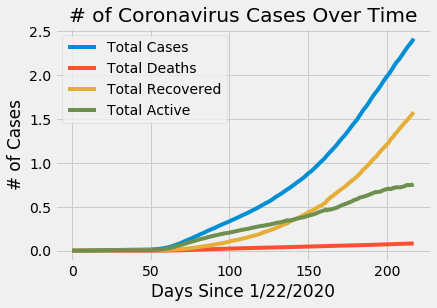

In [9]:
#caculate update (devide 10000000)
total_cases_u = [i/10000000 for i in total_cases]
total_deaths_u = [i/10000000 for i in total_deaths]
total_recovered_u = [i/10000000 for i in total_recovered]
total_active_u = [i/10000000 for i in total_active]
df = pd.DataFrame({'Total Cases': total_cases_u
                   ,'Total Deaths': total_deaths_u
                   ,'Total Recovered': total_recovered_u
                  ,'Total Active': total_active_u})

df.plot(kind='line')
plt.title('# of Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.show()

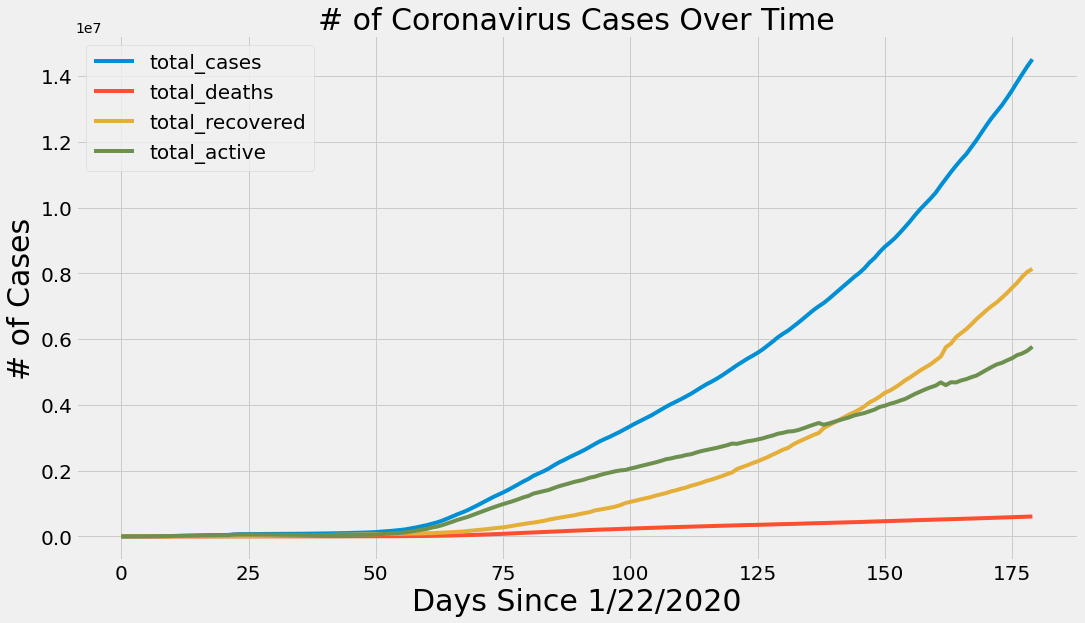

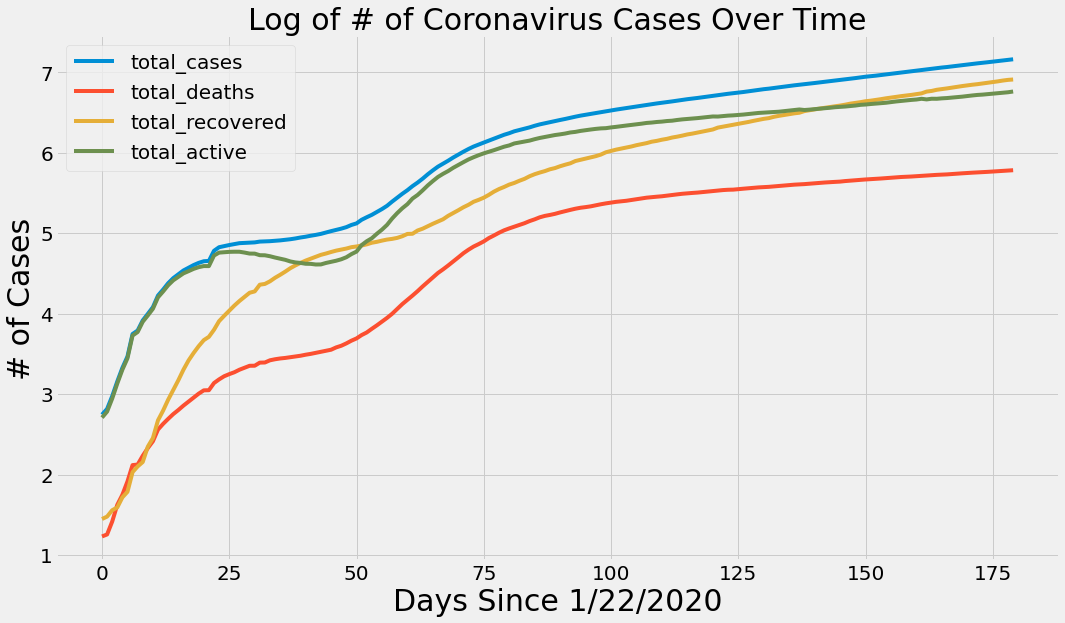

## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

TypeError: 'Text' object is not callable

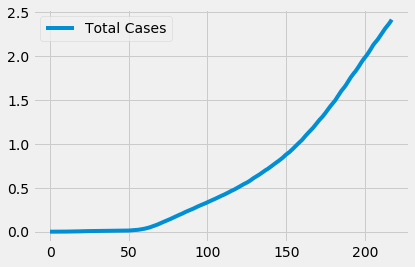

In [10]:
total_cases_u = [i/10000000 for i in total_cases]
total_deaths_u = [i/10000000 for i in total_deaths]
total_recovered_u = [i/10000000 for i in total_recovered]
total_active_u = [i/10000000 for i in total_active]

df_total_cases = pd.DataFrame({'Total Cases': total_cases_u})
df_total_deaths = pd.DataFrame({'Total Deaths': total_deaths_u})
df_total_recovered = pd.DataFrame({'Total Recovered': total_recovered_u})
df_total_active =  pd.DataFrame({'Total Active': total_active_u})

plot1 = df_total_cases.plot(kind='line')
plot1.title('# of Coronavirus Cases Over Time')
plot1.xlabel('Days Since 1/22/2020')
plot1.ylabel('# of Cases')

plot2 = df_total_deaths.plot(kind='line')
plot2.title('# of Coronavirus Deaths Over Time')
plot2.xlabel('Days Since 1/22/2020')
plot2.ylabel('# of Cases')

plot3 = df_total_recovered.plot(kind='line')
plot3.title('# of Coronavirus Recoveries Over Time')
plot3.xlabel('Days Since 1/22/2020')
plot3.ylabel('# of Cases')

plot4 = df_total_active.plot(kind='line')
plot4.title('# of Coronavirus Active Cases Over Time')
plot4.xlabel('Days Since 1/22/2020')
plot4.ylabel('# of Cases')

plt.show()

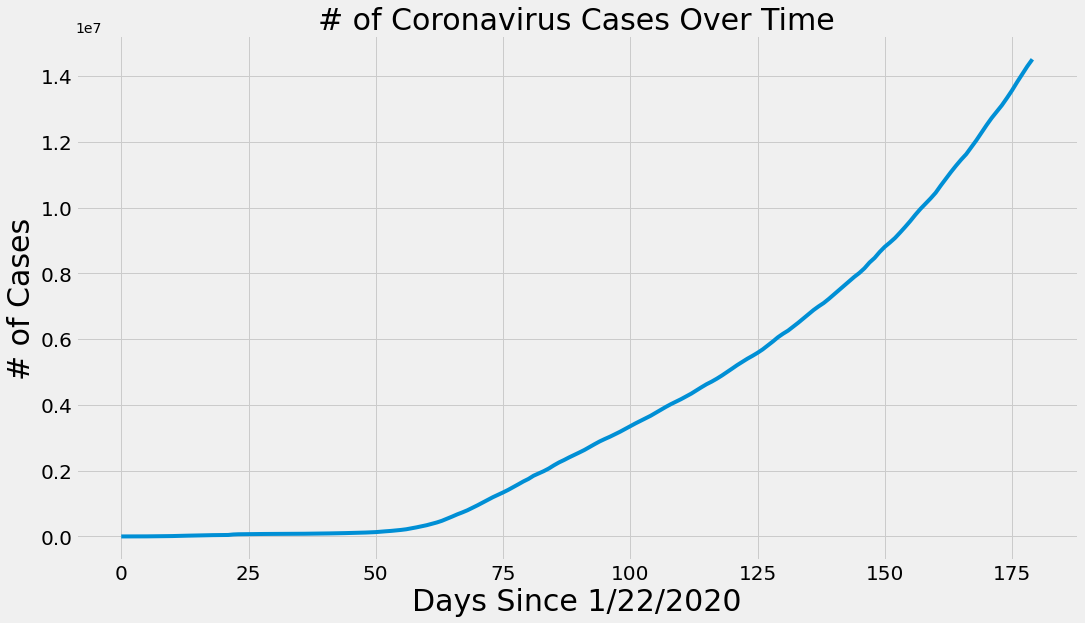

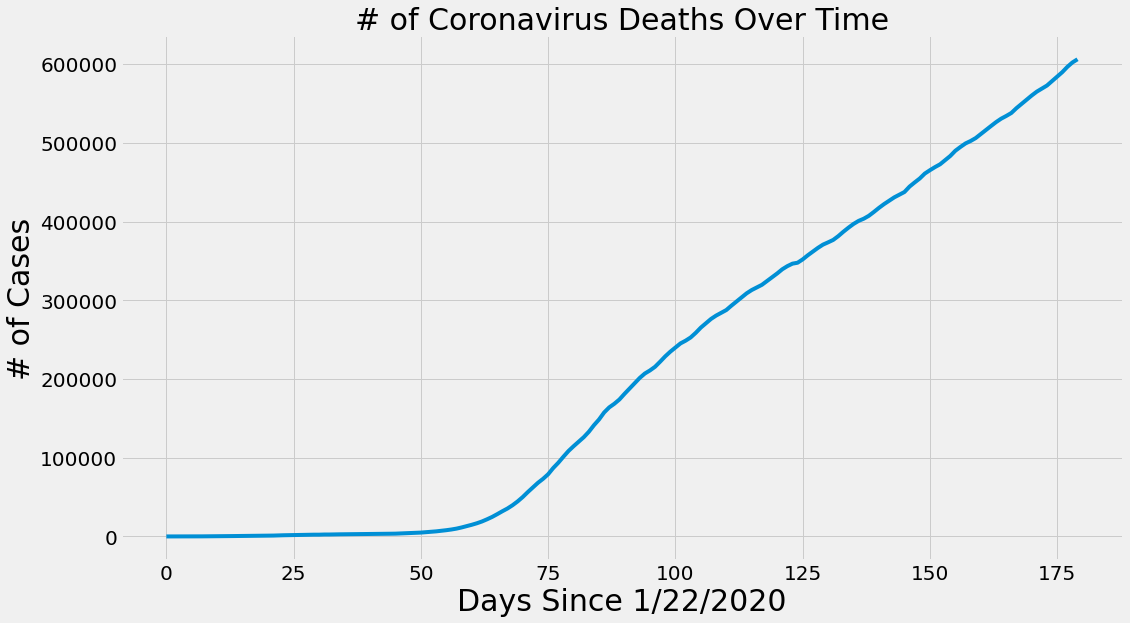

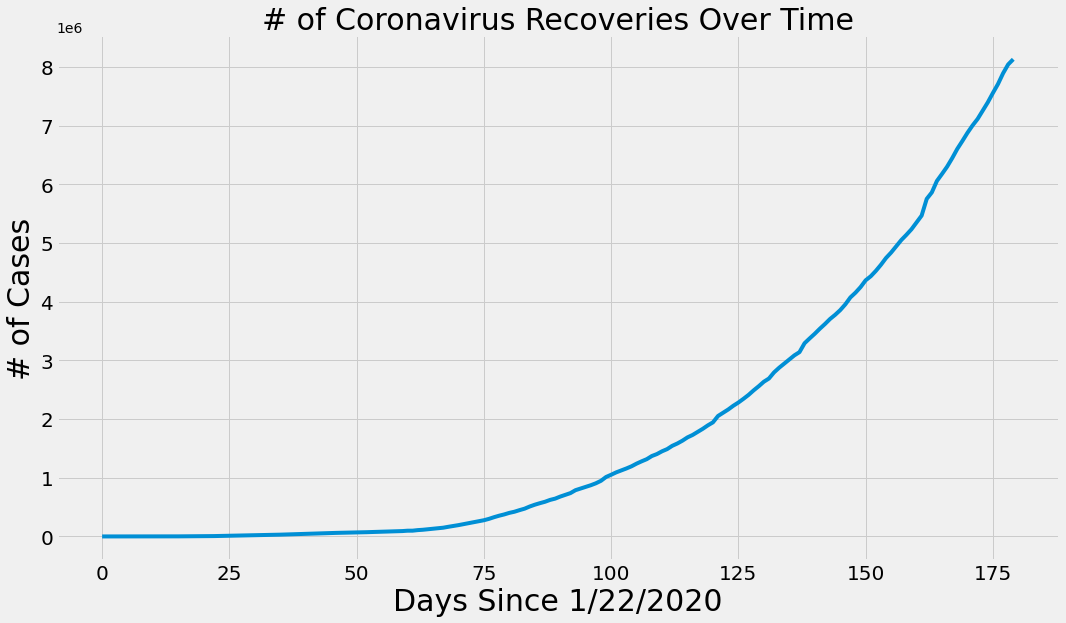

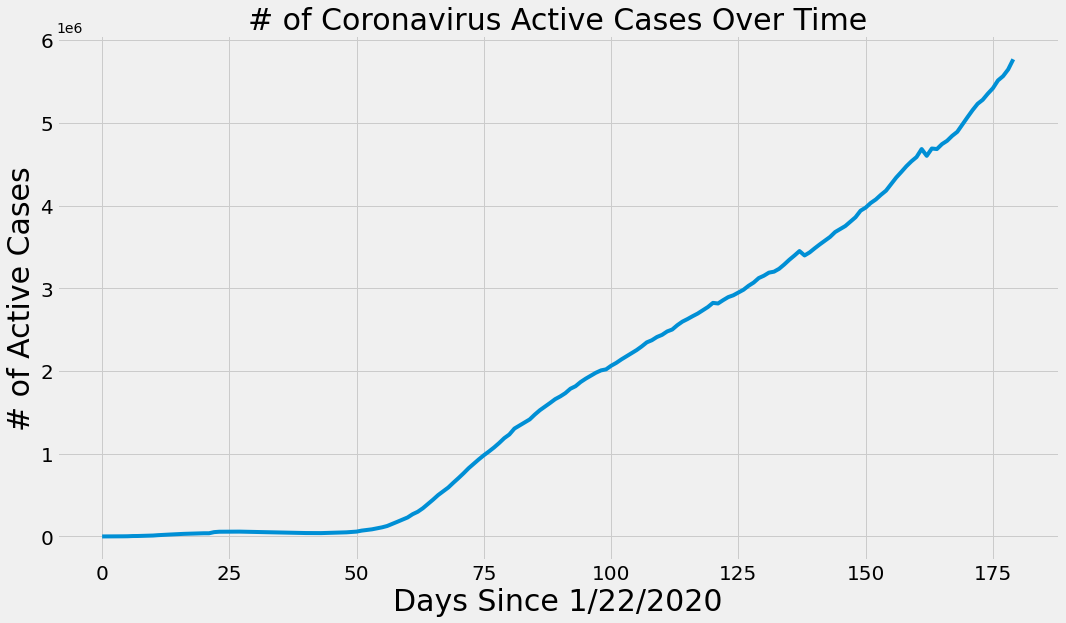

In [10]:
#Insert your code here:


## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [11]:
#Insert your code here:


## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

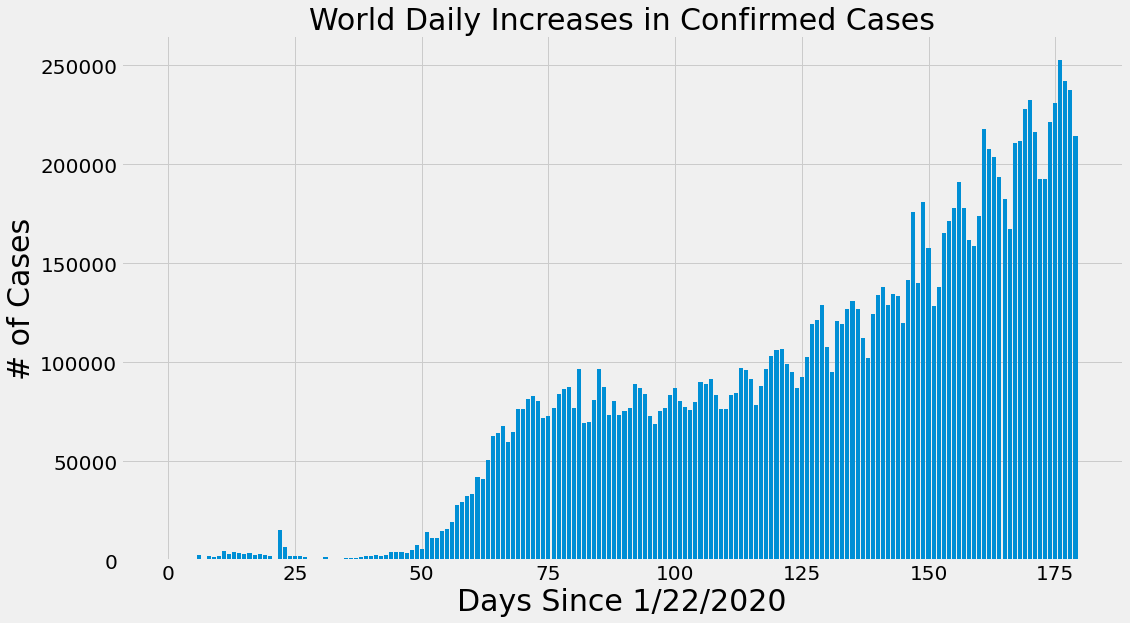

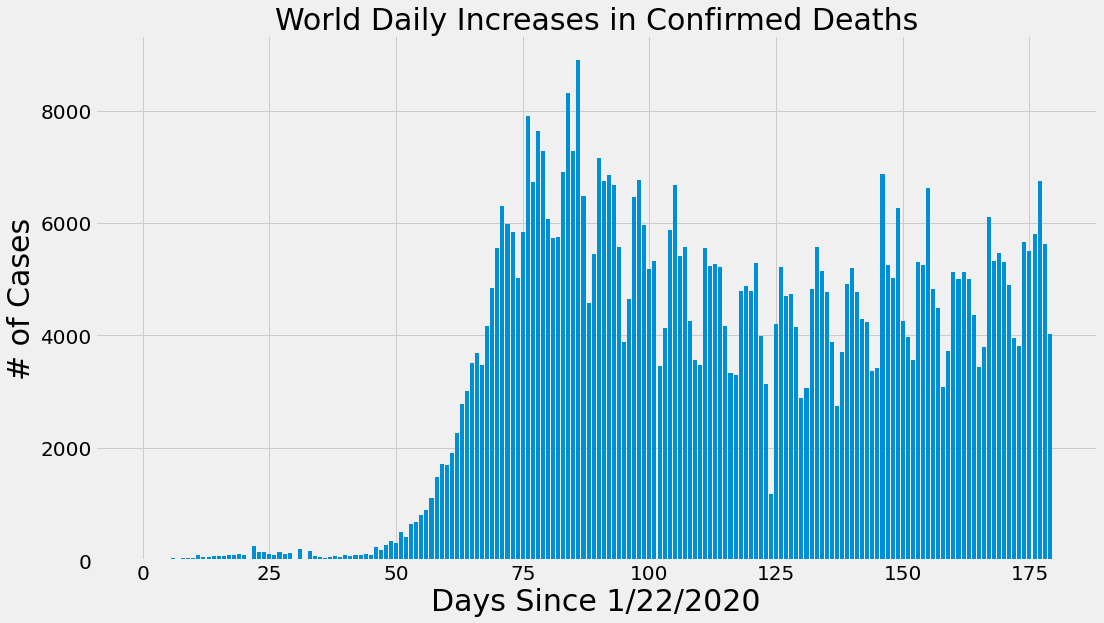

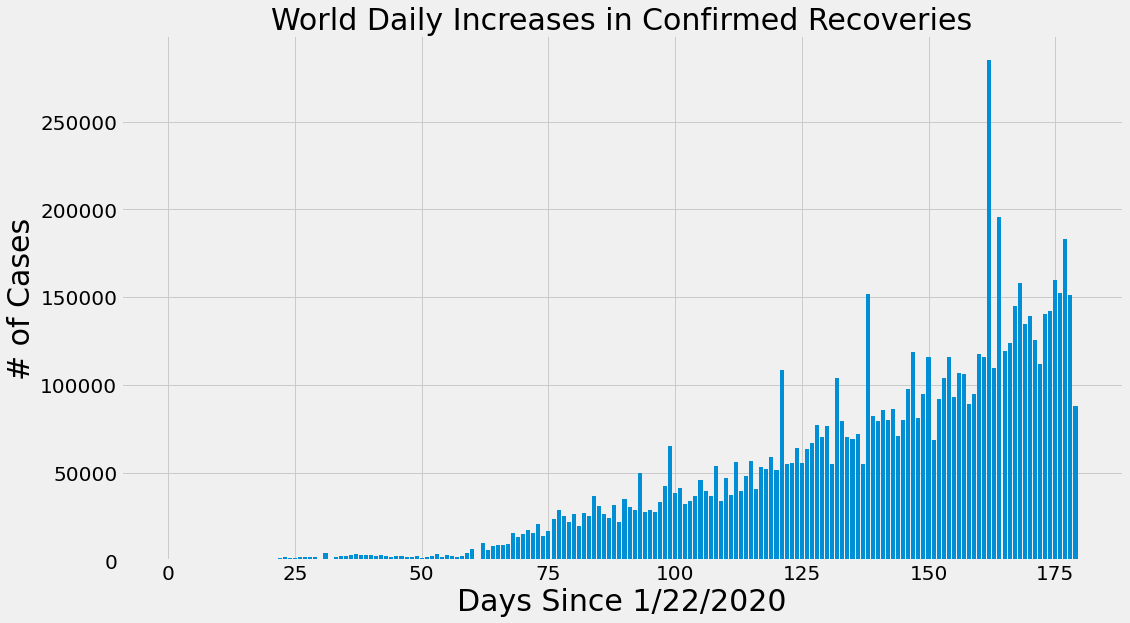

In [12]:
#Insert your code here:


# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [13]:
#Insert your code here:


# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

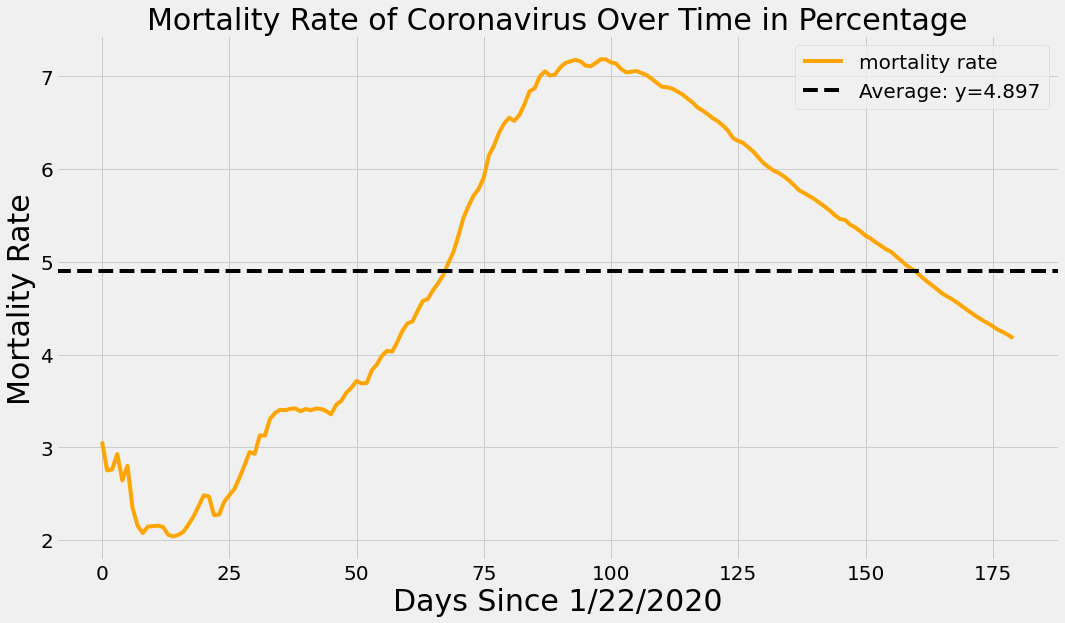

In [14]:
#Insert your code here:


**7.2** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

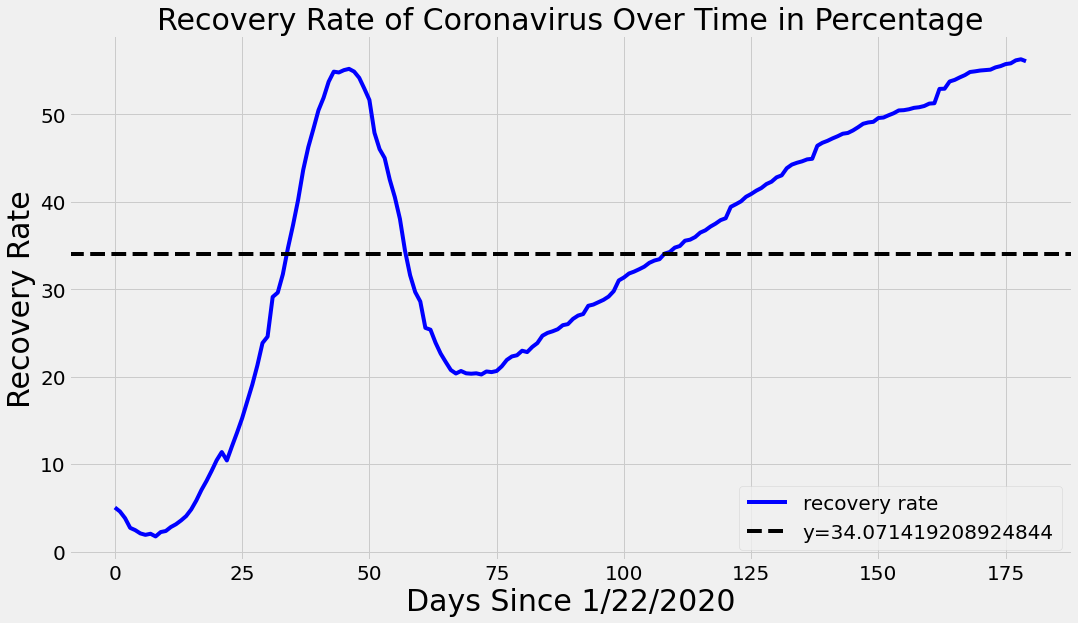

In [15]:
#Insert your code here:


#  5. Continent Analysis

## Data Prerocessing

In [16]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [17]:
#Insert your code here:


Province/State Country/Region continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  7/10/20  7/11/20  7/12/20  \
0        0        0        0        0  ...    34194    34366    34451   
1        0        0        0        0  ...     3278     3371     3454   
2        0        0        0        0  ...    18242    18712    19195   
3        0        0        0        0  ...      855      855      855   
4        0        0        0        0  ...      458      462      506   

   7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  7/18/20  7/19/20  
0    34455    34740    34994    35070    35229    35301    35475  
1     3571     3667     3752     3851     3906     4008     4090  
2    19689    20216    20770    21355    21948    22549    23084  
3      858      861      862      877      880      880      880  
4      525      541      576      607      638      687      705  

[5 rows x 185 columns]

# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Deaths: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [18]:
#Insert your code here:


Lat       Long continent  Confirmed  Deaths  Recoveries  \
Country/Region                                                                 
Afghanistan     33.93911  67.709953      Asia      35475    1181       23634   
Albania         41.15330  20.168300    Europe       4090     112        2311   
Algeria         28.03390   1.659600    Africa      23084    1078       16051   
Andorra         42.50630   1.521800    Europe        880      52         803   
Angola         -11.20270  17.873900    Africa        705      29         221   

                Active  Mortality Rate  
Country/Region                          
Afghanistan      10660            3.33  
Albania           1667            2.74  
Algeria           5955            4.67  
Andorra             25            5.91  
Angola             455            4.11

# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [19]:
#Insert your code here:


Confirmed  Deaths  Recoveries   Active  Mortality Rate
continent                                                            
Africa            721282   15169      380245   325868            2.10
Asia             3392906   79888     2411011   902007            2.35
Australia          13666     145        9927     3594            1.06
Europe           2660158  199052     1535157   925949            7.48
North America    4445519  193846     1584688  2666985            4.36

## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [20]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

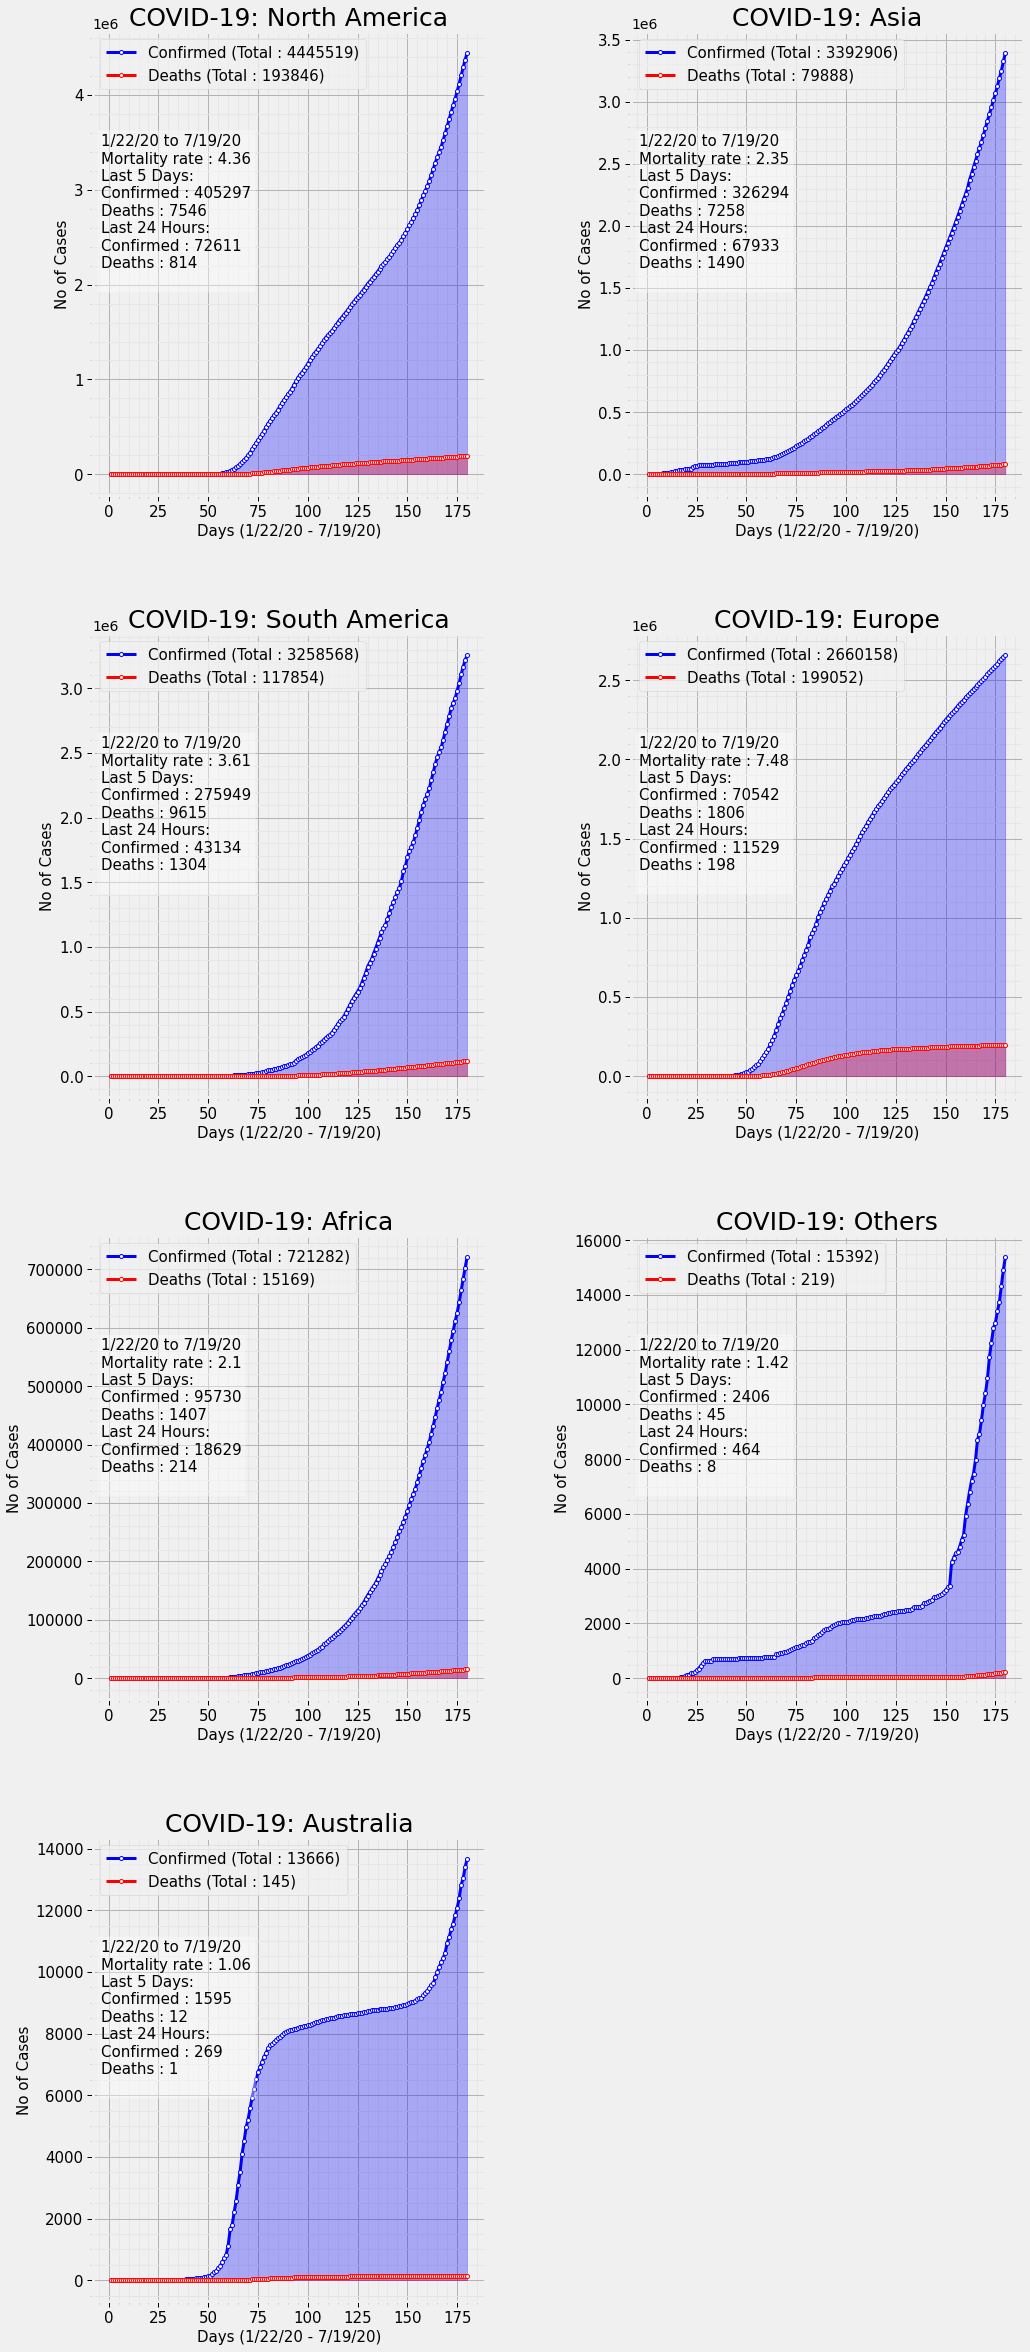

In [21]:
#Insert your code here:



**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

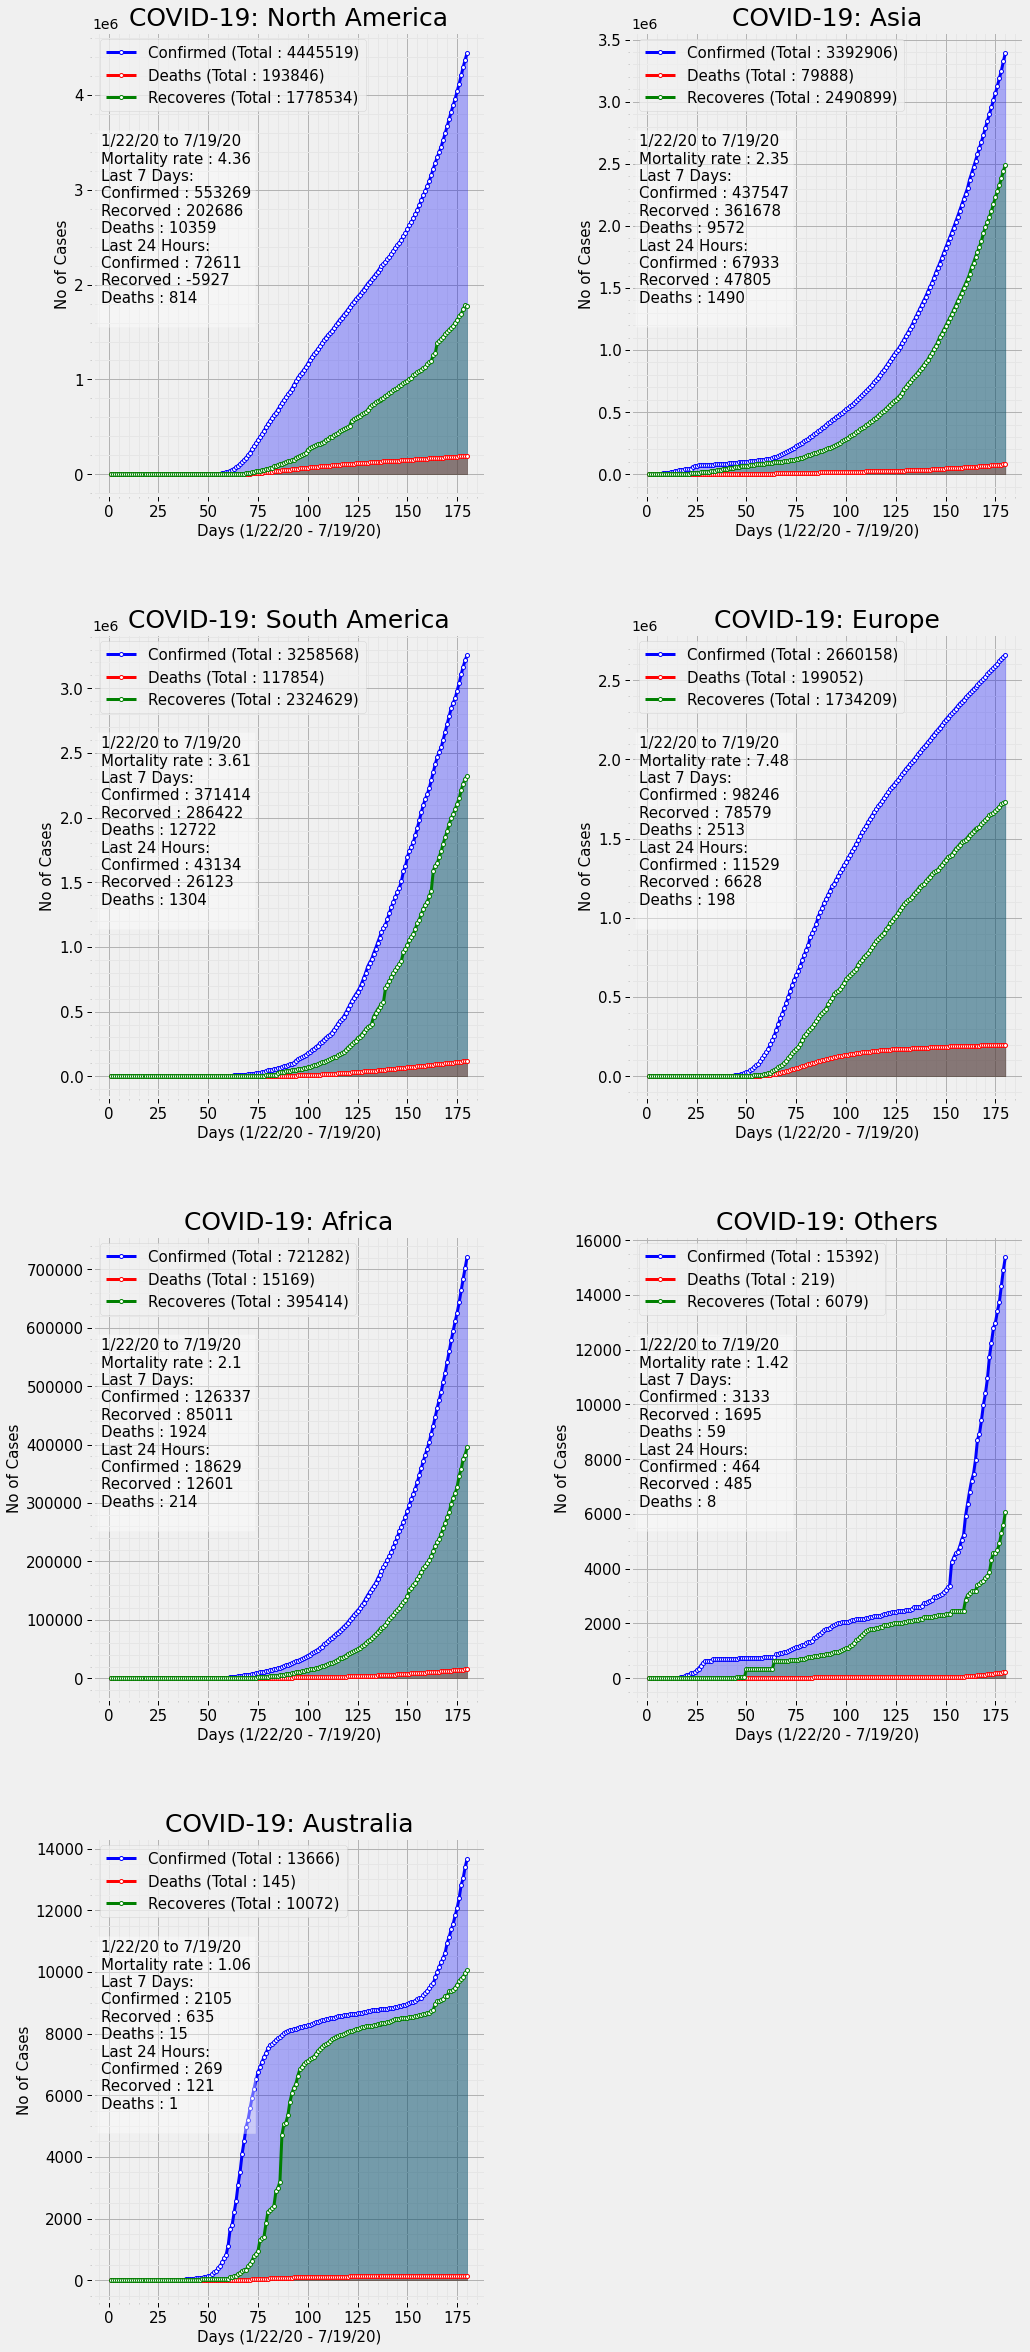

In [22]:
#Insert your code here:


# Problem 12
    Visualize the covariance matrix for continents_df.

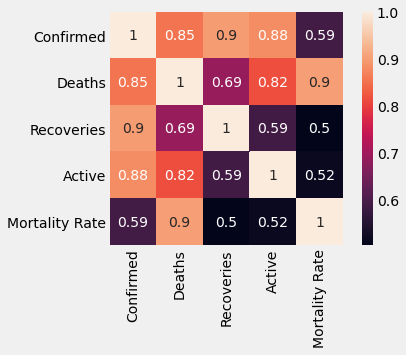

In [23]:
#Insert your code here:

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

/home/hana/hana/env37/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



<Figure size 1080x2880 with 0 Axes>

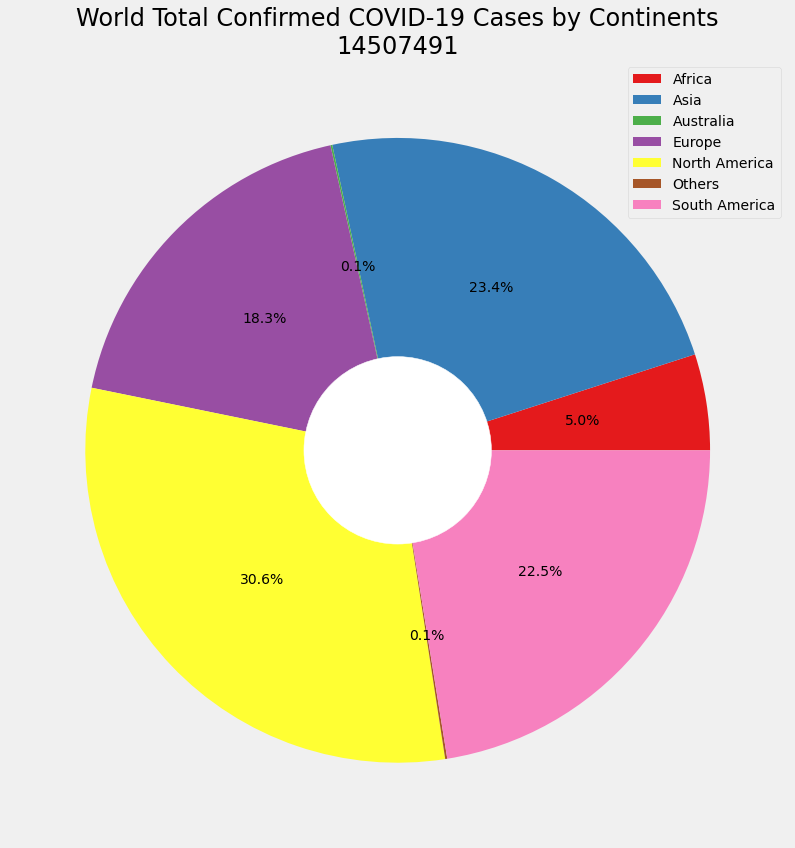

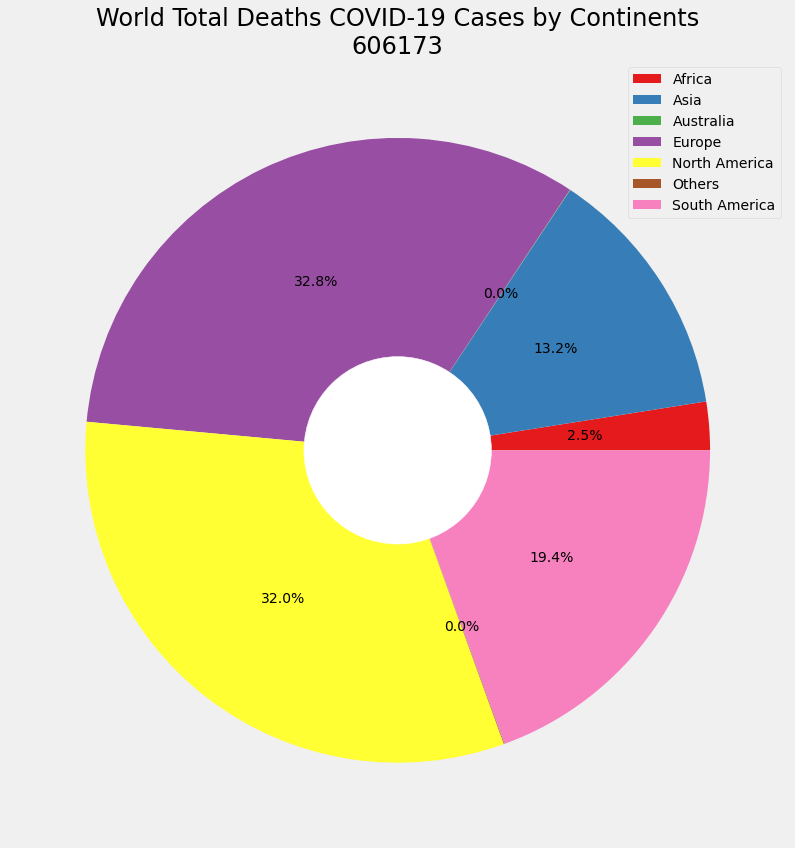

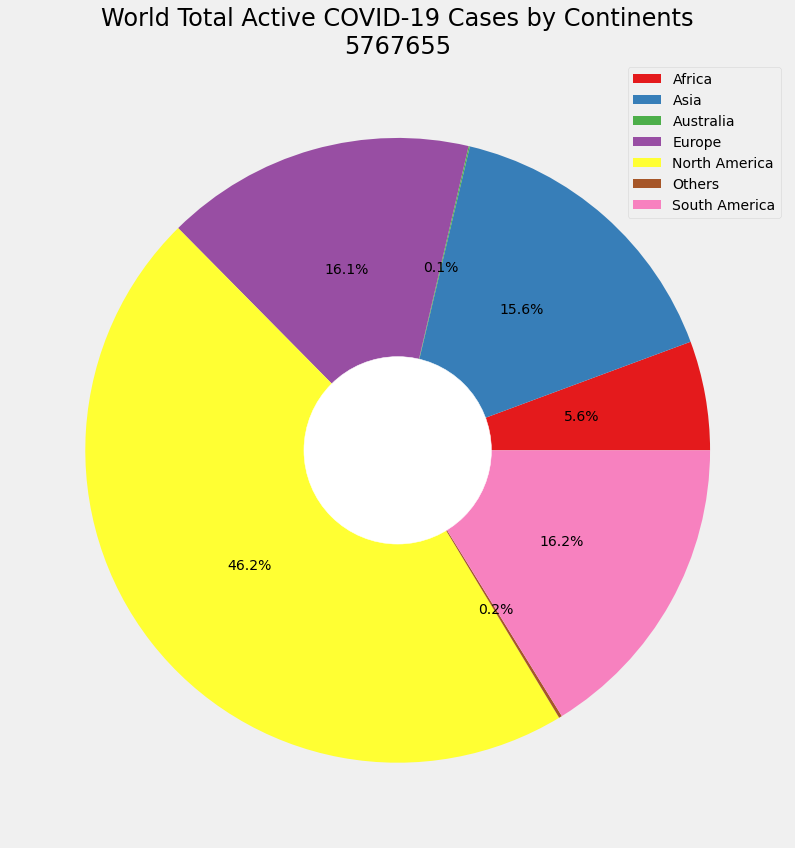

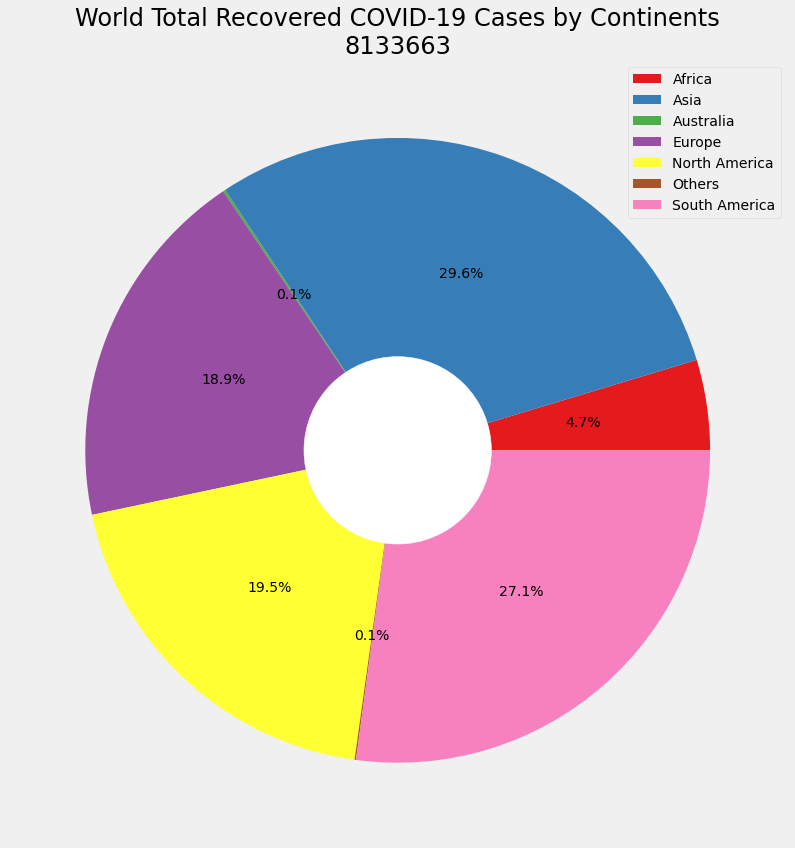

In [24]:
#Insert your code here:


# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [25]:
#Insert your code here:




# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [26]:
#Insert your code here:



/home/hana/hana/env37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning:

divide by zero encountered in log10



# Problem 16
    Filter the top 10 countries baseđ on the number of confirmed cases.

In [27]:
#Insert your code here:

Lat        Long      continent  Confirmed  Deaths  \
Country/Region                                                            
USA             40.000000 -100.000000  North America    3773260  140534   
Brazil         -14.235000  -51.925300  South America    2098389   79488   
India           20.593684   78.962880           Asia    1118206   27497   
Russia          61.524010  105.318756         Europe     770311   12323   
South Africa   -30.559500   22.937500         Africa     364328    5033   
Peru            -9.190000  -75.015200  South America     353590   13187   
Mexico          23.634500 -102.552800  North America     344224   39184   
Chile          -35.675100  -71.543000  South America     330930    8503   
United Kingdom  24.548173  -43.902242         Europe     296358   45385   
Iran            32.427908   53.688046           Asia     273788   14188   

                Recoveries   Active  Mortality Rate  
Country/Region                                       
USA                1131121  2501605            3.72  
Brazil             1459072   559829            3.79  
India               700087   390622            2.46  
Russia              549387   208601            1.60  
South Africa        191059   168236            1.38  
Peru                241955    98448            3.73  
Mexico              254941    50099           11.38  
Chile               301794    20633            2.57  
United Kingdom        1413   249560           15.31  
Iran                237788    21812            5.18

# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

In [28]:
#Insert your code here:


# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here:

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

# Problem 21
**USA dataset**

In [29]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

In [30]:
#Insert your code here:

# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

In [31]:
#Insert your code here: